#### Group Information

Group No: Climate_3

- Member 1: LIM CHIN FENG (157968)
- Member 2: OOI YUE SHENG (158494)
- Member 3: GWEE PER MING (159372)
- Member 4: OOI YONG QIN (159067)

#### Import Libraries

In [20]:
%config Completer.use_jedi=False
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#### Load the dataset

In [3]:
dataset = pd.read_csv('assignment1_dataset.csv')
print(dataset.head(20))


          f1        f2        f3        f4        f5   response
0  -0.764216 -1.016209  0.149410 -0.050119 -0.578127   6.242514
1   0.763880 -1.159509 -0.721492 -0.654067 -0.431670  -8.118241
2   0.519329 -0.664621 -1.694904  1.339779  0.182764  66.722455
3  -0.177388  0.515623  0.135144 -0.647634 -0.405631 -27.716793
4   0.104022  0.749665 -0.939338 -0.090725 -0.639963   8.192075
5  -0.699867  0.019159  1.103377 -0.671614 -0.119063 -18.597563
6  -1.028250  0.962967  0.471027 -1.941219 -0.465591 -73.174734
7   0.337585  1.352948 -1.789795 -0.885796 -0.846150 -25.865464
8   0.295433 -0.907789  0.275980 -0.675526 -0.942592  -9.001596
9   0.442269 -0.704559 -1.127342  1.030206  0.800113  57.076963
10 -0.204840 -1.806102 -1.047471 -0.026998  0.855309   8.256147
11 -0.913785  0.812540 -0.142404  1.158025 -0.595457  36.095129
12 -1.615746  1.026104 -0.358002 -1.082828 -0.634044 -43.717895
13 -1.136888 -0.252588 -0.346081  0.829751 -0.786014  26.838977
14  0.365964  0.217944  0.706191 -0.3314

In [4]:
# check for duplicates
duplicate = dataset[dataset.duplicated()]
print(dataset.duplicated().sum(), "\n")

0 



In [5]:
# understanding the data
dataset.info()
print('\nData Shape:  {}'.format(dataset.shape))
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   f1        1000 non-null   float64
 1   f2        1000 non-null   float64
 2   f3        1000 non-null   float64
 3   f4        1000 non-null   float64
 4   f5        1000 non-null   float64
 5   response  1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB

Data Shape:  (1000, 6)
         f1        f2        f3        f4        f5   response
0 -0.764216 -1.016209  0.149410 -0.050119 -0.578127   6.242514
1  0.763880 -1.159509 -0.721492 -0.654067 -0.431670  -8.118241
2  0.519329 -0.664621 -1.694904  1.339779  0.182764  66.722455
3 -0.177388  0.515623  0.135144 -0.647634 -0.405631 -27.716793
4  0.104022  0.749665 -0.939338 -0.090725 -0.639963   8.192075


#### Define the loss function

In [7]:
def loss_fn(y, yhat):
    """ Pass two arguments
    Arguments:
        y: responses
        yhat: predicted value
    Returns:
        loss: loss value
    """
    
    # Compute the loss value
    loss = np.square(y - yhat).mean()
    return loss

    
    

#### Define function to perform prediction

In [8]:
def predict(w,x):
    """ Pass two arguments
    Arguments:
        w: weights
        X: input features
    Returns:
        yhat: predicted values
    """
    # using dot product between 2 matrices to obtain the prediction. 
    # The prediction is made by multiplying the value of input features 
    # and their respective estimated weights
    yhat = np.dot(w, x.T)
    return yhat
    

#### Define function for model training
Display the training loss value for each epoch of the training loop. The displayed value must be in 3 decimal places.

In [22]:
def train_model(X, y, alpha, max_epoch):
    """ Pass four arguments
    Arguments:
        X: input features
        y: responses
        alpha: learning rate
        max_epoch: maximum epochs
    Returns:
        w: estimated weights
        hist_loss: training loss history
    """
     #Get the number of samples and number of columns from the shape of input features vector
    samples, columns = X.shape
    
    #Initialise the bias(w0) and the weights
    w_init = np.zeros(columns)
    w = np.array(w_init)
    
    hist_loss = []
    
    #Update the value of weights and bias for every epoch 
    for i in range (max_epoch):
        yhat = predict(w, X)  #predict the response using the previous weight and bias
        dw = (1 / samples) * np.dot(X.T, yhat - y)
        w = w - (alpha * dw) #update the weights for next epoch
        
        training_loss = loss_fn(y, yhat)
        hist_loss.append(training_loss)
        print("Epoch %d: Training loss = %.3f" % (i+1, training_loss))
        
    return w, hist_loss

#### Split the dataset
The ratio of training and test is 8:2.

In [10]:
# Select all columns except the last one from the dataset
X = dataset.iloc[:, :-1]

# Select the last column from the dataset
y = dataset.iloc[:, -1]

# Create a column vector of ones with shape (number of samples, 1)
ones_col = np.ones((X.shape[0], 1))

# Horizontally stack the column vector of ones with the feature matrix X
X = np.hstack((ones_col, X))

# split the dataset using train_test_split in 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Train the model

In [26]:
# Train the model using the training data with a learning rate of 0.1 and maximum of 100 epochs
w, hist_loss = train_model(X_train, y_train, 0.1, 100)

Epoch 1: Training loss = 1745.552
Epoch 2: Training loss = 1392.825
Epoch 3: Training loss = 1112.693
Epoch 4: Training loss = 890.159
Epoch 5: Training loss = 713.333
Epoch 6: Training loss = 572.790
Epoch 7: Training loss = 461.056
Epoch 8: Training loss = 372.200
Epoch 9: Training loss = 301.519
Epoch 10: Training loss = 245.281
Epoch 11: Training loss = 200.521
Epoch 12: Training loss = 164.887
Epoch 13: Training loss = 136.511
Epoch 14: Training loss = 113.908
Epoch 15: Training loss = 95.898
Epoch 16: Training loss = 81.544
Epoch 17: Training loss = 70.100
Epoch 18: Training loss = 60.974
Epoch 19: Training loss = 53.694
Epoch 20: Training loss = 47.886
Epoch 21: Training loss = 43.249
Epoch 22: Training loss = 39.548
Epoch 23: Training loss = 36.592
Epoch 24: Training loss = 34.230
Epoch 25: Training loss = 32.343
Epoch 26: Training loss = 30.835
Epoch 27: Training loss = 29.629
Epoch 28: Training loss = 28.665
Epoch 29: Training loss = 27.893
Epoch 30: Training loss = 27.275
Ep

#### Display the estimated weights

In [28]:
# Print the estimated weights
print("The estimated weights are:\n", w)
print("\n")

# Iterate over the weights and print them individually
for i in range(len(w)):
    print("Weight for x{}: {}".format(i, w[i]))

The estimated weights are:
 [ 9.62881097e+00  1.16594602e+01 -9.61370460e-03  2.44856425e-01
  3.69632698e+01  1.46198298e-01]


Weight for x0: 9.628810968980886
Weight for x1: 11.659460221011164
Weight for x2: -0.009613704595479439
Weight for x3: 0.2448564246199856
Weight for x4: 36.96326976722024
Weight for x5: 0.14619829824401628


#### Display the training loss against epoch graph

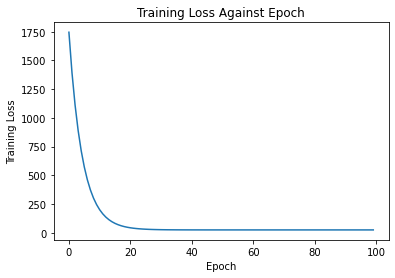

In [29]:
# Plot the training loss history graph

plt.plot(hist_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Against Epoch")
plt.show()

#### Predict the test set

In [16]:
# Generate predictions on the test data using the estimated weights
y_pred = predict(w, X_test)

In [18]:
# Display the prediction and response(actual)

# Create a table to store the value of prediction and response
predictionTable = pd.DataFrame()
predictionTable['Prediction'] = pd.Series(y_pred)
# use to_numpy to convert y_test from pandas series to an array
predictionTable["Response"] = y_test.to_numpy()
print(predictionTable)

     Prediction   Response
0      2.581473  -0.223583
1     55.056507  53.173508
2      6.132532  -1.905123
3    -45.866341 -43.951402
4    -11.147457  -5.041251
..          ...        ...
195   59.557342  67.416960
196   55.028231  53.388698
197  -31.300357 -32.018401
198   93.948323  85.669029
199   32.282950  35.732950

[200 rows x 2 columns]


#### Display the r2 score, mean squared error and mean absolute error

In [19]:
# Calculate the R-squared score
SSE = np.sum(np.square(y_test - y_pred))
SST = np.sum(np.square(y_test - y_test.mean()))
r2 = 1 - (SSE/SST)
print("The R2 score is:", r2)

# Calculate the mean squared error (MSE)
mse = np.square(y_test - y_pred).mean()
print("The mean squared error is:", mse)

# Calculate the mean absolute error (MAE)
abs_diff = np.abs(y_test - y_pred)
mae = np.mean(abs_diff)
print("The mean absolute error is:", mae)

The R2 score is: 0.9830263224395278
The mean squared error is: 26.052842615096115
The mean absolute error is: 4.074753534842067


In [21]:
print("Error analysis for test set:\n")
r2 = r2_score(y_test, y_pred)
print("R2 Score: {}".format(r2))
mse = loss_fn(y_test, y_pred)
print("Mean squared error: {}".format(mse))
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: {}".format(mae))

Error analysis for test set:

R2 Score: 0.9830263224395278
Mean squared error: 26.052842615096115
Mean absolute error: 4.074753534842067


# Analysis
The following analysis is made with the assignment1_dataset.csv in mind, using the provided training function, with a training/test split of 8:2, learning rate(alpha) of 0.1 and number of epochs of 100.

### R2 score:
R2 = 1 - SSE/SST, where SSE is the sum of squared errors between predictions and responses, while SST is the sum of squared errors of the baseline model where the prediction is always made with the mean of responses, y.
SSE  

The R2 value range from 0 to 1, and a higher value of R2 indicates better performance of the model.  
For the test set, since the R2 score is quite high at 0.983, we can say that its R2 score indicates that it is a well-performing model

### Mean squared error:
Mean squared error is the sum of the squared difference between the prediction(y_hat) and response(actual y).  

For the test set, the squared difference between the predicted and actual values of the target variable is 13.439, which is quite low and is similar to the MSE of the training set. This indicates that the model is working well and no overfitting had occurred.  

MSE is also used to calculate the loss function, the lowest value(local minima) is reached by the model at 67 epochs with a learning rate(alpha) of 0.1, with MSE = 26.053 and plateuing after that.  

A lower value of mean squared error is desirable, through gradient descent, we are able to achieve the minimal loss function value, indicated by the decreasing mean squared error.  


### Mean absolute error: 
Mean absolute error is similar to mean squared error, but instead of squaring the error, we just apply the absolute value function on it, so that the error is always >= 0. (Chugh, 2020)

Compared to mean squared error, due to the lack of squaring, mean absolute error punishes large error less.

For the test set, the the mean absolute error is 4.075. This means that on average, the predictions will differ from the responses by 4.075. The low mean absolute error indicates that the model performs well.

## Reference(s):
Chugh, A. (2020, December 8). MAE, MSE, RMSE, Coefficient of Determination, Adjusted R Squared — Which Metric is Better? Medium. https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e  

Noor M.H.M. (2023). Gradient Descent – Halim Noor. Halim Noor. https://halimnoor.com/gradient-descent/  

Noor M.H.M. (2023). Linear Regression – Halim Noor. Halim Noor. https://halimnoor.com/linear-regression/